In [1]:

import pandas as pd
import psycopg
import credentials
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
def connect_to_database():
    """
    Connect to the PostgreSQL database.

    Returns:
        A tuple containing the connection and cursor objects.
    """
    conn = psycopg.connect(
        host="pinniped.postgres.database.azure.com",
        dbname=credentials.DB_NAME,
        user=credentials.DB_USER,
        password=credentials.DB_PASSWORD
    )
    cur = conn.cursor()
    return conn, cur

In [4]:
year = 2021

1.
Summaries of how many colleges and universities are included in the data for the selected year, by state and type of institution (private, public, for-profit, and so on).

In [10]:
def summarize_colleges_by_state_and_type(year):
    """
    Retrieves the summary of how many colleges and universities are included in the data for the selected year,
    grouped by state and type of institution.

    Args:
        year (int): The selected year for which the data is retrieved.

    Returns:
        pandas.DataFrame: A DataFrame containing the summary information, with columns 'region', 'control', and 'count'.
                          'region' represents the state, 'control' represents the type of institution, and 'count' represents
                          the number of colleges/universities in that state and institution type.
    """
    # Connect to the database
    conn, cur = connect_to_database()

    # Query the data for the selected year
    query = f"SELECT region, control,  COUNT(*) as count FROM institutioninformation WHERE year = {year} GROUP BY region, control ORDER BY region, control;"
    cur.execute(query)
    rows = cur.fetchall()

    # Create a DataFrame from the query results
    df = pd.DataFrame(rows, columns=['region', 'control', 'count'])

    # Map region codes to region names
    region_names = {
        0: 'U.S. Service schools',
        1: 'New England',
        2: 'Mid East',
        3: 'Great Lakes',
        4: 'Plains',
        5: 'Southeast',
        6: 'Southwest',
        7: 'Rocky Mountains',
        8: 'Far West',
        9: 'Outlying areas'
    }

    control_names = {
        1: 'Public',
        2: 'Private nonprofit',
        3: 'Private for-profit'
    }

    df['region'] = df['region'].map(region_names)
    df['control'] = df['control'].map(control_names)

    # Close the database connection
    cur.close()
    conn.close()

    return df


print('Colleges by State and Type')
summarize_colleges_by_state_and_type(year)

Colleges by State and Type


,region,control,count
0,U.S. Service schools,Public,1
1,New England,Public,98
2,New England,Private nonprofit,133
3,New England,Private for-profit,80
4,Mid East,Public,247
5,Mid East,Private nonprofit,322
6,Mid East,Private for-profit,310
7,Great Lakes,Public,251
8,Great Lakes,Private nonprofit,259
9,Great Lakes,Private for-profit,295


In [11]:
def summarize_tuition_rates_by_state_and_classification(year):
    """
    Retrieves the summary of current college tuition rates, grouped by state and Carnegie Classification of institution.

    Args:
        year (int): The selected year for which the data is retrieved.

    Returns:
        pandas.DataFrame: A DataFrame containing the summary information, with columns 'region', 'classification', and 'tuition_rate'.
                          'region' represents the state, 'classification' represents the Carnegie Classification of institution,
                          and 'tuition_rate' represents the current tuition rate for that state and classification.
    """
    # Connect to the database
    conn, cur = connect_to_database()

    # Query the data for the selected year
    query = f"SELECT region, ccbasic, AVG(tuitfte) AS avg_tuition FROM institutioninformation NATURAL JOIN studentbody WHERE year = {year} GROUP BY region, ccbasic ORDER BY region;"
    cur.execute(query)
    rows = cur.fetchall()

    # Create a DataFrame from the query results
    df = pd.DataFrame(rows, columns=['region', 'classification', 'tuition_rate'])

    # Map region codes to region names
    region_names = {
        0: 'U.S. Service schools',
        1: 'New England',
        2: 'Mid East',
        3: 'Great Lakes',
        4: 'Plains',
        5: 'Southeast',
        6: 'Southwest',
        7: 'Rocky Mountains',
        8: 'Far West',
        9: 'Outlying areas'
    }

    classification_names = {
        0: 'Not classified',
        1: 'Associates Colleges: High Transfer-High Traditional',
        2: 'Traditional/Nontraditional',
        3: 'Associate\'s Colleges: High Transfer-High Nontraditional',
        4: 'Associate\'s Colleges: Mixed Transfer/Career & Technical-High Traditional',
        5: 'Associate\'s Colleges: Mixed Transfer/Career & Technical-Mixed Traditional/Nontraditional',
        6: 'Associate\'s Colleges: Mixed Transfer/Career & Technical-High Nontraditional',
        7: 'Associate\'s Colleges: High Career & Technical-High Traditional',
        8: 'Associate\'s Colleges: High Career & Technical-Mixed Traditional/Nontraditional',
        9: 'Associate\'s Colleges: High Career & Technical-High Nontraditional',
        10: 'Special Focus Two-Year: Health Professions',
        11: 'Special Focus Two-Year: Technical Professions',
        12: 'Special Focus Two-Year: Arts & Design',
        13: 'Special Focus Two-Year: Other Fields',
        14: 'Baccalaureate/Associate\'s Colleges: Associate\'s Dominant',
        15: 'Doctoral Universities: Very High Research Activity',
        16: 'Doctoral Universities: High Research Activity',
        17: 'Doctoral/Professional Universities',
        18: 'Master\'s Colleges & Universities: Larger Programs',
        19: 'Master\'s Colleges & Universities: Medium Programs',
        20: 'Master\'s Colleges & Universities: Small Programs',
        21: 'Baccalaureate Colleges: Arts & Sciences Focus',
        22: 'Baccalaureate Colleges: Diverse Fields',
        23: 'Baccalaureate/Associate\'s Colleges: Mixed Baccalaureate/Associate\'s',
        24: 'Special Focus Four-Year: Faith-Related Institutions',
        25: 'Special Focus Four-Year: Medical Schools & Centers',
        26: 'Special Focus Four-Year: Other Health Professions Schools',
        27: 'Special Focus Four-Year: Research Schools',
        28: 'Special Focus Four-Year: Engineering and Other Technology-Related Schools',
        29: 'Special Focus Four-Year: Business & Management Schools',
        30: 'Special Focus Four-Year: Arts, Music & Design Schools',
        31: 'Special Focus Four-Year: Law Schools',
        32: 'Special Focus Four-Year: Other Special Focus Institutions',
        33: 'Tribal Colleges'
    }

    df['region'] = df['region'].map(region_names)
    df['classification'] = df['classification'].map(classification_names)

    # Close the database connection
    cur.close()
    conn.close()

    return df


print('Tuition Rates by State and Classification')
summarize_tuition_rates_by_state_and_classification(year)

tuition rates by state and classification


,region,classification,tuition_rate
0,U.S. Service schools,Baccalaureate Colleges: Diverse Fields,0E-20
1,New England,Associate's Colleges: Mixed Transfer/Career & ...,3837.2857142857142857
2,New England,Doctoral Universities: Very High Research Acti...,28568.700000000000
3,New England,Associate's Colleges: Mixed Transfer/Career & ...,3301.6666666666666667
4,New England,Master's Colleges & Universities: Small Programs,13766.000000000000
...,...,...,...
257,Outlying areas,Special Focus Four-Year: Other Health Professi...,15001.666666666667
258,Outlying areas,Special Focus Two-Year: Other Fields,31198.000000000000
259,Outlying areas,Doctoral/Professional Universities,5367.2500000000000000
260,Outlying areas,Baccalaureate Colleges: Diverse Fields,3814.2857142857142857


2.
Summaries of current college tuition rates, by state and Carnegie Classification of institution.

In [ ]:
def summarize_tuition_rates_by_state_and_classification(year):
    """
    Retrieves the summary of current college tuition rates, grouped by state and Carnegie Classification of institution.

    Args:
        year (int): The selected year for which the data is retrieved.

    Returns:
        pandas.DataFrame: A DataFrame containing the summary information, with columns 'region', 'classification', and 'tuition_rate'.
                          'region' represents the state, 'classification' represents the Carnegie Classification of institution,
                          and 'tuition_rate' represents the current tuition rate for that state and classification.
    """
    # Connect to the database
    conn, cur = connect_to_database()

    # Query the data for the selected year
    query = f"SELECT region, ccbasic, AVG(tuitfte) AS avg_tuition FROM institutioninformation NATURAL JOIN studentbody WHERE year = {year} GROUP BY region, ccbasic ORDER BY region;"
    cur.execute(query)
    rows = cur.fetchall()

    # Create a DataFrame from the query results
    df = pd.DataFrame(rows, columns=['region', 'classification', 'tuition_rate'])

    # Map region codes to region names
    region_names = {
        0: 'U.S. Service schools',
        1: 'New England',
        2: 'Mid East',
        3: 'Great Lakes',
        4: 'Plains',
        5: 'Southeast',
        6: 'Southwest',
        7: 'Rocky Mountains',
        8: 'Far West',
        9: 'Outlying areas'
    }

    classification_names = {
        0: 'Not classified',
        1: 'Associates Colleges: High Transfer-High Traditional',
        2: 'Traditional/Nontraditional',
        3: 'Associate\'s Colleges: High Transfer-High Nontraditional',
        4: 'Associate\'s Colleges: Mixed Transfer/Career & Technical-High Traditional',
        5: 'Associate\'s Colleges: Mixed Transfer/Career & Technical-Mixed Traditional/Nontraditional',
        6: 'Associate\'s Colleges: Mixed Transfer/Career & Technical-High Nontraditional',
        7: 'Associate\'s Colleges: High Career & Technical-High Traditional',
        8: 'Associate\'s Colleges: High Career & Technical-Mixed Traditional/Nontraditional',
        9: 'Associate\'s Colleges: High Career & Technical-High Nontraditional',
        10: 'Special Focus Two-Year: Health Professions',
        11: 'Special Focus Two-Year: Technical Professions',
        12: 'Special Focus Two-Year: Arts & Design',
        13: 'Special Focus Two-Year: Other Fields',
        14: 'Baccalaureate/Associate\'s Colleges: Associate\'s Dominant',
        15: 'Doctoral Universities: Very High Research Activity',
        16: 'Doctoral Universities: High Research Activity',
        17: 'Doctoral/Professional Universities',
        18: 'Master\'s Colleges & Universities: Larger Programs',
        19: 'Master\'s Colleges & Universities: Medium Programs',
        20: 'Master\'s Colleges & Universities: Small Programs',
        21: 'Baccalaureate Colleges: Arts & Sciences Focus',
        22: 'Baccalaureate Colleges: Diverse Fields',
        23: 'Baccalaureate/Associate\'s Colleges: Mixed Baccalaureate/Associate\'s',
        24: 'Special Focus Four-Year: Faith-Related Institutions',
        25: 'Special Focus Four-Year: Medical Schools & Centers',
        26: 'Special Focus Four-Year: Other Health Professions Schools',
        27: 'Special Focus Four-Year: Research Schools',
        28: 'Special Focus Four-Year: Engineering and Other Technology-Related Schools',
        29: 'Special Focus Four-Year: Business & Management Schools',
        30: 'Special Focus Four-Year: Arts, Music & Design Schools',
        31: 'Special Focus Four-Year: Law Schools',
        32: 'Special Focus Four-Year: Other Special Focus Institutions',
        33: 'Tribal Colleges'
    }

    df['region'] = df['region'].map(region_names)
    df['classification'] = df['classification'].map(classification_names)

    # Close the database connection
    cur.close()
    conn.close()

    return df


print('tuition rates by state and classification')
print(summarize_tuition_rates_by_state_and_classification(year))

In [12]:
def summarize_tuition_rates_by_state(year):
    """
    Retrieves the summary of current college tuition rates, grouped by state of institution.

    Args:
        year (int): The selected year for which the data is retrieved.

    Returns:
        pandas.DataFrame: A DataFrame containing the summary information, with columns 'region', and 'tuition_rate'.
                          'region' represents the state, 'classification' 
                          and 'tuition_rate' represents the current tuition rate for that state and classification.
    """
    # Connect to the database
    conn, cur = connect_to_database()

    # Query the data for the selected year
    query = f"SELECT region, AVG(tuitfte) AS avg_tuition FROM institutioninformation NATURAL JOIN studentbody WHERE year = {year} GROUP BY region ORDER BY region;"
    cur.execute(query)
    rows = cur.fetchall()

    # Create a DataFrame from the query results
    df = pd.DataFrame(rows, columns=['region', 'tuition_rate'])

    # Map region codes to region names
    region_names = {
        0: 'U.S. Service schools',
        1: 'New England',
        2: 'Mid East',
        3: 'Great Lakes',
        4: 'Plains',
        5: 'Southeast',
        6: 'Southwest',
        7: 'Rocky Mountains',
        8: 'Far West',
        9: 'Outlying areas'
    }

    df['region'] = df['region'].map(region_names)

    # Close the database connection
    cur.close()
    conn.close()

    return df


print('tuition rates by state')
summarize_tuition_rates_by_state(year)

tuition rates by state


,region,tuition_rate
0,U.S. Service schools,0E-20
1,New England,17993.003215434084
2,Mid East,13381.717861205916
3,Great Lakes,11294.747826086957
4,Plains,9996.6534216335540839
5,Southeast,9894.2957227138643068
6,Southwest,9534.0258620689655172
7,Rocky Mountains,9892.9698492462311558
8,Far West,12515.888198757764
9,Outlying areas,6988.8842105263157895


In [13]:
def summarize_tuition_rates_by_classification(year):
    """
    Retrieves the summary of current college tuition rates, grouped by Carnegie Classification of institution.

    Args:
        year (int): The selected year for which the data is retrieved.

    Returns:
        pandas.DataFrame: A DataFrame containing the summary information, with columns 'classification', and 'tuition_rate'.
                          'classification' represents the Carnegie Classification of institution,
                          and 'tuition_rate' represents the current tuition rate for that classification.
    """
    # Connect to the database
    conn, cur = connect_to_database()

    # Query the data for the selected year
    query = f"SELECT ccbasic, AVG(tuitfte) AS avg_tuition FROM institutioninformation NATURAL JOIN studentbody WHERE year = {year} GROUP BY ccbasic ORDER BY ccbasic;"
    cur.execute(query)
    rows = cur.fetchall()

    # Create a DataFrame from the query results
    df = pd.DataFrame(rows, columns=['classification', 'tuition_rate'])

    # Map region codes to classification names
    classification_names = {
        0: 'Not classified',
        1: 'Associates Colleges: High Transfer-High Traditional',
        2: 'Traditional/Nontraditional',
        3: 'Associate\'s Colleges: High Transfer-High Nontraditional',
        4: 'Associate\'s Colleges: Mixed Transfer/Career & Technical-High Traditional',
        5: 'Associate\'s Colleges: Mixed Transfer/Career & Technical-Mixed Traditional/Nontraditional',
        6: 'Associate\'s Colleges: Mixed Transfer/Career & Technical-High Nontraditional',
        7: 'Associate\'s Colleges: High Career & Technical-High Traditional',
        8: 'Associate\'s Colleges: High Career & Technical-Mixed Traditional/Nontraditional',
        9: 'Associate\'s Colleges: High Career & Technical-High Nontraditional',
        10: 'Special Focus Two-Year: Health Professions',
        11: 'Special Focus Two-Year: Technical Professions',
        12: 'Special Focus Two-Year: Arts & Design',
        13: 'Special Focus Two-Year: Other Fields',
        14: 'Baccalaureate/Associate\'s Colleges: Associate\'s Dominant',
        15: 'Doctoral Universities: Very High Research Activity',
        16: 'Doctoral Universities: High Research Activity',
        17: 'Doctoral/Professional Universities',
        18: 'Master\'s Colleges & Universities: Larger Programs',
        19: 'Master\'s Colleges & Universities: Medium Programs',
        20: 'Master\'s Colleges & Universities: Small Programs',
        21: 'Baccalaureate Colleges: Arts & Sciences Focus',
        22: 'Baccalaureate Colleges: Diverse Fields',
        23: 'Baccalaureate/Associate\'s Colleges: Mixed Baccalaureate/Associate\'s',
        24: 'Special Focus Four-Year: Faith-Related Institutions',
        25: 'Special Focus Four-Year: Medical Schools & Centers',
        26: 'Special Focus Four-Year: Other Health Professions Schools',
        27: 'Special Focus Four-Year: Research Schools',
        28: 'Special Focus Four-Year: Engineering and Other Technology-Related Schools',
        29: 'Special Focus Four-Year: Business & Management Schools',
        30: 'Special Focus Four-Year: Arts, Music & Design Schools',
        31: 'Special Focus Four-Year: Law Schools',
        32: 'Special Focus Four-Year: Other Special Focus Institutions',
        33: 'Tribal Colleges'
    }

    df['classification'] = df['classification'].map(classification_names)

    # Close the database connection
    cur.close()
    conn.close()

    return df


print('Tuition Rates by Classification')
summarize_tuition_rates_by_classification(year)

tuition rates by classification


,classification,tuition_rate
0,NaN,11146.847974510696
1,Associates Colleges: High Transfer-High Tradit...,2886.5531914893617021
2,Traditional/Nontraditional,2690.1934306569343066
3,Associate's Colleges: High Transfer-High Nontr...,2718.3920000000000000
4,Associate's Colleges: Mixed Transfer/Career & ...,3090.3009708737864078
5,Associate's Colleges: Mixed Transfer/Career & ...,2777.1875000000000000
6,Associate's Colleges: Mixed Transfer/Career & ...,2817.4516129032258065
7,Associate's Colleges: High Career & Technical-...,1962.7699115044247788
8,Associate's Colleges: High Career & Technical-...,5900.5000000000000000
9,Associate's Colleges: High Career & Technical-...,14170.400000000000


3.
A table showing the best- and worst-performing institutions by loan repayment rates.

In [17]:
def get_best_and_worst_performing_institutions_by_loan_repayment_rates(year):
    # Connect to the database
    conn, cur = connect_to_database()

    # Query the data for the selected year
    query = f"SELECT * FROM loanrepayments WHERE year = {year};"

    cur.execute(query)
    rows = cur.fetchall()

    # Create a DataFrame from the query results
    df = pd.DataFrame(rows, columns=[
        'unitid',
        'year',
        'dbrr1_fed_ug_n',
        'dbrr1_fed_ug_rt',
        'dbrr4_fed_ug_n',
        'dbrr4_fed_ug_rt',
        'dbrr5_fed_ug_n',
        'dbrr5_fed_ug_rt',
        'dbrr10_fed_ug_n',
        'dbrr10_fed_ug_rt',
        'dbrr20_fed_ug_n',
        'dbrr20_fed_ug_rt'
        ])

    # Join the institutioninformation table to get the institution name (instnm)
    institution_query = f"SELECT unitid, instnm FROM institutioninformation WHERE year = {year};"
    cur.execute(institution_query)
    institution_rows = cur.fetchall()
    institution_df = pd.DataFrame(institution_rows, columns=['unitid', 'instnm'])

    # Calculate scaled values for each loan repayment column
    for column in df.columns[2:]:
        min_value = df[column].min()
        max_value = df[column].max()
        df[column] = (df[column] - min_value) / (max_value - min_value)

    # Calculate the average scaled value for each institution
    df['avg_scaled_value'] = df.iloc[:, 2:].mean(axis=1)

    # Sort the DataFrame by the average scaled value
    df = df.sort_values(by=['avg_scaled_value'])

    # Merge the institutioninformation DataFrame with the loanrepayments DataFrame
    df = pd.merge(df, institution_df, on='unitid')

    # Keep only the instnm, and average scaled value columns
    df = df[['instnm', 'avg_scaled_value']]

    # Get the top 10 best performing institutions
    worst = df.head(10)

    # Get the top 10 worst performing institutions
    best = df.tail(10)

    # Close the database connection
    cur.close()
    conn.close()

    return worst, best


In [18]:
worst, best = get_best_and_worst_performing_institutions_by_loan_repayment_rates(year)
print('Worst Performing Institutions by Loan Repayment Rates')
worst

worst performing institutions by loan repayment rates


,instnm,avg_scaled_value
0,Webb Institute,0.000121
1,Pontifical College Josephinum,0.000134
2,West Virginia University Hospital Departments ...,0.000213
3,CVPH Medical Center School of Radiologic Techn...,0.000228
4,Hebrew Theological College,0.000242
5,Divine Word College,0.000244
6,UnityPoint Health-Des Moines School of Radiolo...,0.000250
7,Saint Charles Borromeo Seminary-Overbrook,0.000254
8,Conception Seminary College,0.000282
9,Beth Medrash Govoha,0.000299


In [19]:
print('Best Performing Institutions by Loan Repayment Rates')
best

best performing institutions by loan repayment rates


,instnm,avg_scaled_value
5474,Mountain Empire Community College,0.506046
5475,Saybrook University,0.506046
5476,Patrick Henry Community College,0.506046
5477,Grace School of Theology,0.506046
5478,Pickens Technical College,0.506046
5479,Western Theological Seminary,0.506046
5480,Frontier Nursing University,0.506046
5481,Adler Graduate School,0.506046
5482,Asbury Theological Seminary,0.506046
5483,Boston Graduate School of Psychoanalysis Inc,0.506046


4.
Graphs showing how tuition rates and loan repayment rates have changed over time, either in aggregate (such as averages for all institutions by type) or for selected institutions (such as the most expensive).

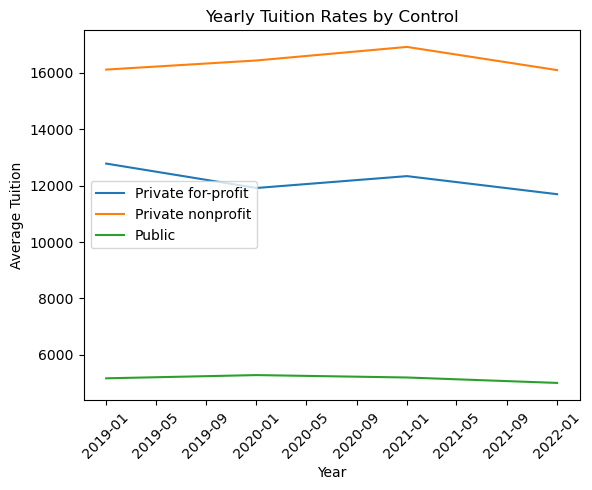

In [22]:
def get_yearly_tuition_rates_by_control():
    # Connect to the database
    conn, cur = connect_to_database()

    # Query the data for the selected year
    query = f"SELECT year, control, AVG(tuitfte) AS avg_tuition FROM institutioninformation NATURAL JOIN studentbody GROUP BY year, control ORDER BY year;"
    cur.execute(query)
    rows = cur.fetchall()

    # Create a DataFrame from the query results
    df = pd.DataFrame(rows, columns=['year', 'control', 'avg_tuition'])

    df['year'] = pd.to_datetime(df['year'], format='%Y')

    control_names = {
        1: 'Public',
        2: 'Private nonprofit',
        3: 'Private for-profit'
    }

    df['control'] = df['control'].map(control_names)

    # Plotting
    fig, ax = plt.subplots()
    for control, data in df.groupby('control'):
        ax.plot(data['year'], data['avg_tuition'], label=control)

    ax.set_title('Yearly Tuition Rates by Control')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Tuition')
    ax.legend(loc='center left')
    plt.xticks(rotation=45)
    plt.show()

    # Close the database connection
    cur.close()
    conn.close()

get_yearly_tuition_rates_by_control()

5. 
A map of the united states showing the tuition rate by region.

/var/folders/y8/c6zpzd417bv1k1m86t8h6wvm0000gn/T/ipykernel_64595/3946870044.py:41: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


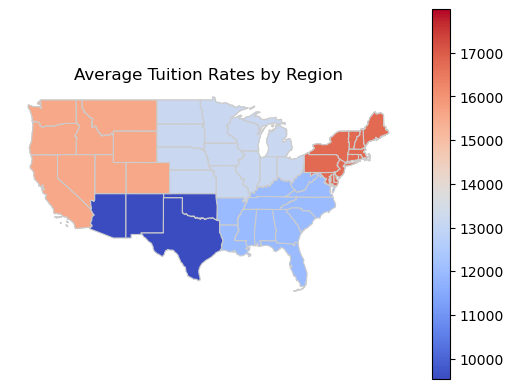

In [32]:
def plot_map_tuitionrate_region(year):
    # Connect to the database
    conn, cur = connect_to_database()

    # Query the data for the selected year
    query = f"SELECT region, AVG(tuitfte) AS avg_tuition FROM institutioninformation NATURAL JOIN studentbody WHERE year = {year} GROUP BY region ORDER BY region;"
    cur.execute(query)
    rows = cur.fetchall()

    # Create a DataFrame from the query results
    df = pd.DataFrame(rows, columns=['region', 'avg_tuition'])

    # Map region codes to region names
    region_names = {
        0: 'U.S. Service schools',
        1: 'Northeast',
        2: 'Northeast',
        3: 'Midwest',
        4: 'Midwest',
        5: 'Southeast',
        6: 'Southwest',
        7: 'West',
        8: 'West',
        9: 'Outlying areas'
    }

    df['region'] = df['region'].map(region_names)

    states = gpd.read_file('mapping/usa-states-census-2014.shp')

    # Merge the GeoDataFrame with the DataFrame containing the average tuition rates
    merged = states.merge(df, left_on='region', right_on='region')

    # Plotting
    fig, ax = plt.subplots()
    merged.plot(column='avg_tuition', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    ax.set_title('Average Tuition Rates by Region')
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=merged['avg_tuition'].min(), vmax=merged['avg_tuition'].max()))
    sm._A = []
    cbar = fig.colorbar(sm)
    plt.show()

    # Close the database connection
    cur.close()
    conn.close()   

plot_map_tuitionrate_region(year)

    